In [1]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.utils import plot_model
import os

In [2]:
num_classes = 35
img_rows,img_cols = 64,64
batch_size = 32
train_data_dir = './handgesture_digit/train'
validation_data_dir = "./handgesture_digit/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    rotation_range = 30,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_rows,img_cols),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_rows,img_cols),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical')

Found 22500 images belonging to 9 classes.
Found 9000 images belonging to 9 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(units=9,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

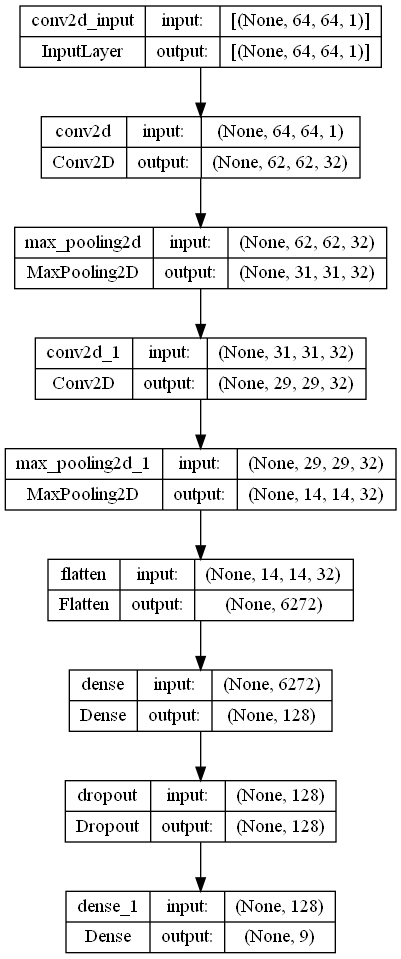

In [4]:
from keras.utils import plot_model
plot_model(model, to_file = 'model.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

nb_train_samples = 22500
nb_validation_samples = 9000
epochs=5

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples//batch_size,
    validation_data = validation_generator,
    epochs=epochs,
    validation_steps = nb_validation_samples//batch_size)

Epoch 1/5
703/703 [==============================] - 321s 454ms/step - loss: 0.3912 - accuracy: 0.8679 - val_loss: 0.0246 - val_accuracy: 0.9908
Epoch 2/5
703/703 [==============================] - 351s 499ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 5.7269e-04 - val_accuracy: 0.9998
Epoch 3/5
703/703 [==============================] - 354s 503ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 1.1261e-04 - val_accuracy: 1.0000
Epoch 4/5
535/703 [=====================>........] - ETA: 1:07 - loss: 0.0164 - accuracy: 0.9951

704/704 [==============================] - 74s 105ms/step - loss: 3.4945e-04 - accuracy: 0.9999
Test Score:  0.0010131867602467537
Test accuracy:  0.9995555281639099
Test Score:  0.00034945030347444117
Test accuracy:  0.9998666644096375


Text(0.5, 1.0, 'Accuracy evolution')

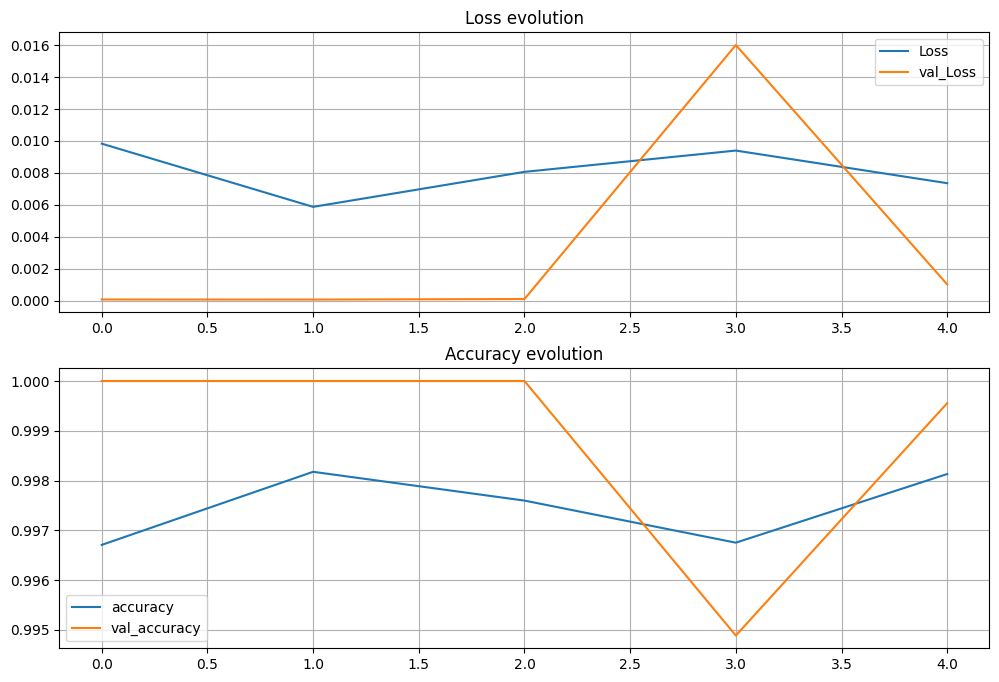

In [29]:
score = model.evaluate(validation_generator)
score1=model.evaluate(train_generator)
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])
print("Test Score: ", score1[0])
print("Test accuracy: ", score1[1])
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [30]:
X_test, Y_test = next(validation_generator)
X_train ,Y_train = next(train_generator)
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 7.74036925577093e-06; accuracy of 100.0%


In [31]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = model.predict(X_test)
y_predict_classes =[np.argmax(element) for element in y_pred]
#print("Classification Report\n",classification_report(Y_test,y_predict_classes))
y_predict_classes

1/1 [==============================] - 0s 229ms/step


[6,
 7,
 3,
 4,
 0,
 7,
 3,
 5,
 4,
 4,
 1,
 7,
 2,
 5,
 6,
 4,
 8,
 8,
 3,
 8,
 5,
 1,
 0,
 3,
 0,
 3,
 5,
 6,
 7,
 6,
 2,
 2]

In [32]:
model_json = model.to_json()
with open("model-bw_digit.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model-bw_digit.h5')
print('Weights saved')

Model Saved
Weights saved
